## Exploratory anaylsis

This script imports the original mHealth data and runs exploratory analysis and
creates a filtered database fdf where users with < 3 entries are removed

Two copies of data are saved from this script:
- expd_data.csv: data types are changed, empty columns are removed, but no rows are deleted
- filtered_data.csv: rows where userIDs have <3 entries are removed


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in original data
file_path = 'original_data.csv'
df = pd.read_csv(file_path)
#df.head()
df.shape

(32052, 55)

In [4]:
df.columns
#df.dtypes

Index(['ID', 'Date', 'Is Period', 'Period Intensity', 'Pain Level', 'Headache',
       'Insomnia', 'Bloating', 'nausea', 'diarrhea', 'nutrition', 'medication',
       'Create Date', 'Updated Date', 'User ID', 'period_id', 'is_ovulated',
       'is_conceive', 'acne', 'skin_changes', 'backaches', 'bodyaches',
       'constipation', 'stomach_cramps', 'cravings_salty', 'cravings_sweet',
       'dizziness', 'indigestion', 'joint_pains', 'leg_pain', 'hip_pain',
       'neckaches', 'sciatic_pain', 'tender_breasts', 'temperature',
       'tiredness', 'overall_pain', 'fever', 'vomiting', 'short_of_breath',
       'coughing', 'pins_and_needles', 'bladder_pain', 'hot_flashes',
       'appetite_loss', 'notes', 'weight', 'steps', 'water', 'sleep',
       'sleep_minutes', 'other_moods', 'other_lifestyles', 'sex',
       'other_negative_mood'],
      dtype='object')

In [5]:
df.rename(columns={'Date': 'date'}, inplace=True)
df.rename(columns={'Is Period': 'period'}, inplace=True)
df.rename(columns={'Period Intensity': 'period_intensity'}, inplace=True)
df.rename(columns={'Pain Level': 'pain_level'}, inplace=True)
df.rename(columns={'Headache': 'headache'}, inplace=True)
df.rename(columns={'Insomnia': 'insomnia'}, inplace=True)
df.rename(columns={'Bloating': 'bloating'}, inplace=True)
df.rename(columns={'Create Date': 'create_date'}, inplace=True)
df.rename(columns={'Updated Date': 'updated_date'}, inplace=True)
df.rename(columns={'User ID': 'userID'}, inplace=True)
df.rename(columns={'period_id': 'periodID'}, inplace=True)
df.rename(columns={'sleep': 'sleep_hours'}, inplace=True)

In [6]:
# Convert the datatypes from float to categorical
df["period"] = df["period"].astype("category")
df["period_intensity"] = df["period_intensity"].astype("category")
df["pain_level"] = df["pain_level"].astype("category")
df["headache"] = df["headache"].astype("category")
df["insomnia"] = df["insomnia"].astype("category")
df["bloating"] = df["bloating"].astype("category")
df["nausea"] = df["nausea"].astype("category")
df["diarrhea"] = df["diarrhea"].astype("category")
df["is_ovulated"] = df["is_ovulated"].astype("category")
df["is_conceive"] = df["is_conceive"].astype("category")
df["acne"] = df["acne"].astype("category")
df["skin_changes"] = df["skin_changes"].astype("category")
df["backaches"] = df["backaches"].astype("category")
df["bodyaches"] = df["bodyaches"].astype("category")
df["constipation"] = df["constipation"].astype("category")
df["stomach_cramps"] = df["stomach_cramps"].astype("category")
df["cravings_salty"] = df["cravings_salty"].astype("category")
df["cravings_sweet"] = df["cravings_sweet"].astype("category")
df["dizziness"] = df["dizziness"].astype("category")
df["indigestion"] = df["indigestion"].astype("category")
df["joint_pains"] = df["joint_pains"].astype("category")
df["leg_pain"] = df["leg_pain"].astype("category")
df["hip_pain"] = df["hip_pain"].astype("category")
df["neckaches"] = df["neckaches"].astype("category")
df["sciatic_pain"] = df["sciatic_pain"].astype("category")
df["tender_breasts"] = df["tender_breasts"].astype("category")
df["temperature"] = df["temperature"].astype("category")
df["tiredness"] = df["tiredness"].astype("category")
df["overall_pain"] = df["overall_pain"].astype("category")
df["fever"] = df["fever"].astype("category")
df["vomiting"] = df["vomiting"].astype("category")
df["short_of_breath"] = df["short_of_breath"].astype("category")
df["coughing"] = df["coughing"].astype("category")
df["pins_and_needles"] = df["pins_and_needles"].astype("category")
df["bladder_pain"] = df["bladder_pain"].astype("category")
df["hot_flashes"] = df["hot_flashes"].astype("category")
df["appetite_loss"] = df["appetite_loss"].astype("category")
df["sex"] = df["sex"].astype("category")
df["other_negative_mood"] = df["other_negative_mood"].astype("category")

# Convert date column to datetime
df['datetime'] = pd.to_datetime(df['date'])
# Create a new date column that is date only without time
df['date'] = df['datetime'].dt.date
# Convert other date columns to datetime
df['create_date'] = pd.to_datetime(df['create_date'])
df['updated_date'] = pd.to_datetime(df['updated_date'])

# Convert IDs to strings
df['ID'] =  df['ID'].astype(int)
df['userID'] =  df['userID'].astype(int)


In [7]:
# Convert sleep_hour & sleep_minutes into 1 variable
df['sleep'] =  (df['sleep_hours']) * 60 + df['sleep_minutes']

# Drop sleep_hours and sleep_minutes
df = df.drop(columns=['sleep_hours', 'sleep_minutes'])

In [8]:
new_order = ['ID', 'date',  'datetime','create_date', 'updated_date', 'userID', 'periodID', 
             'period', 'is_ovulated', 'is_conceive', 'sex', 
             'period_intensity', 'pain_level', 'backaches', 'bodyaches',  'stomach_cramps', 
             'joint_pains', 'tender_breasts', 'overall_pain', 'headache', 
             'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
             'appetite_loss', 'cravings_salty', 'cravings_sweet', 'nutrition', 
             'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles',
             'temperature',   'fever', 'hot_flashes', 'short_of_breath', 'coughing', 
             'insomnia', 'sleep', 'weight', 'steps', 'water',
             'medication', 'notes', 'other_moods', 'other_lifestyles']

# Reorder DataFrame
df = df[new_order]

In [9]:
pd.set_option('display.max_columns', None)
#df.head()

### Data points

In [11]:
print("Number of data points", len(df['ID'].unique()))
print("Number of unique DATE points", len(df['date'].unique()))

print("Number of user IDs",len(df['userID'].unique()))
print("Number of period IDs",len(df['periodID'].unique()))

Number of data points 32052
Number of unique DATE points 998
Number of user IDs 5659
Number of period IDs 4223


In [12]:
# Find the first and last dates
first_date = df['date'].min()
last_date = df['date'].max()

# Print timeframe for data collection
duration = last_date - first_date
print(f"First date: {first_date}")
print(f"Last date: {last_date}")
print(f"Duration: {duration}")

First date: 1970-01-01
Last date: 2023-10-27
Duration: 19657 days, 0:00:00


In [13]:
# Correcting dates that were incorrect in the df
starting_date = datetime.strptime('2020-01-01', '%Y-%m-%d').date()
incorrect_dates = df.loc[df['date'] < starting_date]

for ID in incorrect_dates['ID']:  
    df.loc[df['ID'] == ID, 'date'] = df.loc[df['ID'] == ID, 'create_date'].dt.date

# The following dates were updated
print(df.loc[df['ID'].isin(incorrect_dates['ID']), ['ID', 'date', 'create_date']])

          ID        date         create_date
1037    1131  2021-08-04 2021-08-04 06:19:26
1038    1132  2021-08-04 2021-08-04 06:19:42
1039    1133  2021-08-04 2021-08-04 06:21:07
1040    1134  2021-08-04 2021-08-04 06:21:28
1041    1135  2021-08-04 2021-08-04 06:21:53
26445  26542  2023-04-27 2023-04-27 22:34:33
31197  31307  2023-09-29 2023-09-29 17:02:27
31271  31386  2023-10-02 2023-10-02 19:20:06
31291  31406  2023-10-03 2023-10-03 12:36:43
31340  31455  2023-10-04 2023-10-04 18:12:23
31479  31594  2023-10-09 2023-10-09 08:43:35
31560  31675  2023-10-12 2023-10-12 11:23:32
31572  31687  2023-10-12 2023-10-12 19:21:57
31719  31834  2023-10-16 2023-10-16 22:39:35
31754  31869  2023-10-17 2023-10-17 20:52:13
31825  31940  2023-10-19 2023-10-19 21:28:02
32048  32163  2023-10-27 2023-10-27 08:05:06


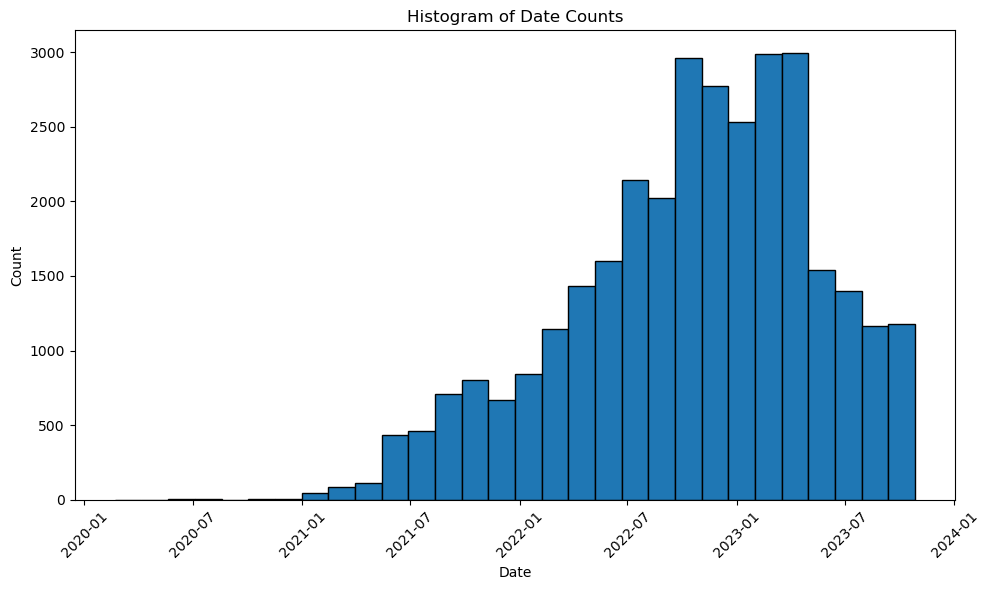

In [14]:
# Create a histogram of the dates
plt.figure(figsize=(10, 6))
plt.hist(df['date'], bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Histogram of Date Counts')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [15]:
# App was released in 2021 so all users prior to that were test users
# Select all userIDs created prior to 2021

release_date = datetime.strptime('2021-05-01', '%Y-%m-%d').date()
developers = df.loc[df['date'] < release_date]
developers['userID'].unique()

array([   4,   41,   36,    6,   43,   51,   52,   50,   55,   63,   64,
         56,    2,   32,   71,   76,   87,   88,   89,   78,   99,  151,
        170,  394,  397, 3891])

In [16]:
# Get the data types of each column & group columns by type
columns_by_type = {}

for column, dtype in df.dtypes.items():
    dtype_name = dtype.name
    if dtype_name not in columns_by_type:
        columns_by_type[dtype_name] = []
    columns_by_type[dtype_name].append(column)

for dtype, columns in columns_by_type.items():
    print(f"{dtype}: {columns}\n")

int64: ['ID', 'userID']

object: ['date', 'nutrition', 'medication', 'notes', 'other_moods', 'other_lifestyles']

datetime64[ns]: ['datetime', 'create_date', 'updated_date']

float64: ['periodID', 'sleep', 'weight', 'steps', 'water']

category: ['period', 'is_ovulated', 'is_conceive', 'sex', 'period_intensity', 'pain_level', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 'overall_pain', 'headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia']



In [17]:
# Get all unique values for categorical variables
unique_values = {col: df[col].unique() for col in df.columns if df[col].dtype.name == 'category'}

# Print unique values for each category type column
for column, values in unique_values.items():
    print(f"'{column}': {values}")

'period': [1, 0]
Categories (2, int64): [0, 1]
'is_ovulated': [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
'is_conceive': [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
'sex': [0, 1]
Categories (2, int64): [0, 1]
'period_intensity': [3.0, 0.0, 1.0, NaN, 2.0, 4.0, 5.0]
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
'pain_level': [NaN, 7.0, 3.0, 2.0, 10.0, ..., 5.0, 0.0, 9.0, 1.0, 8.0]
Length: 12
Categories (11, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.0, 8.0, 9.0, 10.0]
'backaches': [NaN, 1.0, 0.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'bodyaches': [NaN, 1.0, 0.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'stomach_cramps': [NaN, 1.0, 2.0, 0.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'joint_pains': [NaN, 0.0, 2.0, 1.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'tender_breasts': [NaN, 1.0, 2.0, 0.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'overall_pain': [NaN, 1.0, 2.0, 0.0]
Categories (3, float64): [0.0, 1.0, 2.0]
'headache': [NaN, 1.0, 0.0, 2.0]
Categories

### Missing data

In [19]:
# List of columns where value_counts() is empty
empty_columns = [col for col in df.columns if df[col].dropna().empty]
print("Columns with empty value_counts():", empty_columns)

# Drop the empty columns
df = df.drop(columns=empty_columns)
df.shape

Columns with empty value_counts(): []


(32052, 49)

In [20]:
df.isnull().sum()

ID                      0
date                    0
datetime                0
create_date             0
updated_date            0
userID                  0
periodID            21530
period                  0
is_ovulated           983
is_conceive           983
sex                     0
period_intensity    21520
pain_level          12107
backaches           18553
bodyaches           20924
stomach_cramps      19497
joint_pains         24986
tender_breasts      25368
overall_pain        29366
headache            20671
indigestion         27402
bloating            16633
constipation        24230
diarrhea            26399
nausea              22487
vomiting            29631
appetite_loss       26287
cravings_salty      27193
cravings_sweet      25872
nutrition           27289
skin_changes        26066
acne                23593
tiredness           17271
dizziness           24991
pins_and_needles    28585
temperature         31314
fever               29360
hot_flashes         26933
short_of_bre

# Grouping by User Analysis

In [22]:
# Aggregate data to get the number of entries per user
user_entry_cnt = df['userID'].value_counts()
user_entry_cnt = user_entry_cnt.reset_index()
user_entry_cnt = user_entry_cnt.sort_values(by='count', ascending=False)
user_entry_cnt.head()

,userID,count
0,1815,502
1,4394,299
2,567,257
3,113,249
4,318,236


In [23]:
print("Number of entries", user_entry_cnt['count'].sum())
print("Number of users", len(df['userID'].unique()))

# Average number of entries per user
print("Avg number of entries per user", round(user_entry_cnt['count'].mean(), 2))

# Number of entries per user
user_entry_cnt = df.groupby('userID')['userID'].value_counts()
user_entry_cnt = user_entry_cnt.reset_index()

Number of entries 32052
Number of users 5659
Avg number of entries per user 5.66


In [24]:
# UserID that only make 1 entry
single_entries = user_entry_cnt[user_entry_cnt['count'] == 1]['userID']
print("Number of userIDs that only make 1 entry:", len(single_entries))


Number of userIDs that only make 1 entry: 2690


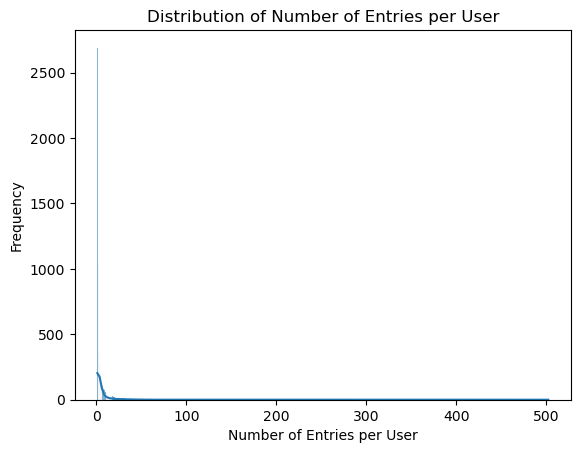

In [25]:
# Visualize user entry distribution
sns.histplot(user_entry_cnt['count'], kde=True)
plt.xlabel('Number of Entries per User')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Entries per User')
plt.show()

# Filtering data
## Remove users with few or outlier number of entries

In [27]:
# UserID that have only 1-2 entries 
remove_list = user_entry_cnt[(user_entry_cnt['count'] < 3) | (user_entry_cnt['count'] > 500)]['userID']

print("Number of userIDs to remove:", len(remove_list))
remove_list

Number of userIDs to remove: 3719


9         52
10        55
12        63
14        71
15        76
        ... 
5654    8603
5655    8606
5656    8607
5657    8608
5658    8609
Name: userID, Length: 3719, dtype: int64

In [28]:
# ids_to_remove to list object
remove_list = remove_list.tolist()
print(len(remove_list))

3719


In [29]:
# Create a filtered df with some users removed
fdf = df[~df['userID'].isin(remove_list)]

# Remove developerd & test users with IDs 64, 32
dev_users = developers['userID'].unique().tolist()
test_users = [64, 32, 36]
fdf = fdf[~fdf['userID'].isin(dev_users)]
fdf = fdf[~fdf['userID'].isin(test_users)]

fdf.shape

(26516, 49)

In [30]:
# There are no positive entries for 'is_ovulated' or 'is_conceive' in the filtered db, so these columns can be dropped
#fdf['is_ovulated'].value_counts()
#fdf['is_conceive'].value_counts()

fdf = fdf.drop(columns=['is_ovulated',  'is_conceive'])
fdf.shape

(26516, 47)

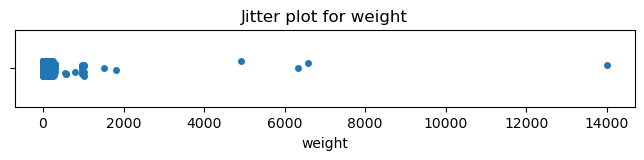

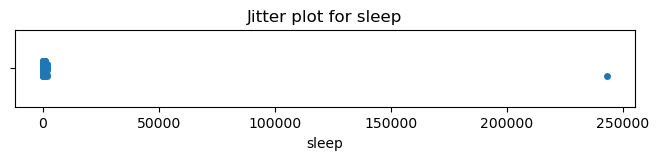

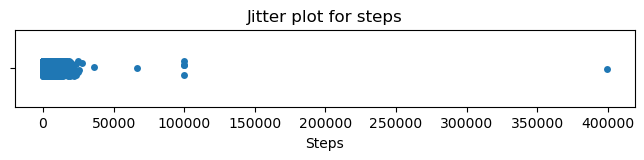

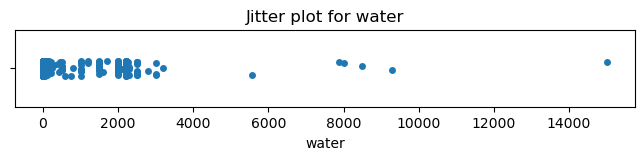

In [31]:
# Check for outliers for 'weight', 'sleep', 'steps', 'water'

plt.figure(figsize=(8, 1))
sns.stripplot(x='weight', data=fdf)
plt.title('Jitter plot for weight')
plt.xlabel('weight')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='sleep', data=fdf)
plt.title('Jitter plot for sleep')
plt.xlabel('sleep')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='steps', data=fdf)
plt.title('Jitter plot for steps')
plt.xlabel('Steps')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='water', data=fdf)
plt.title('Jitter plot for water')
plt.xlabel('water')
plt.show()

In [32]:
# Remove outliers for 'weight', 'sleep', 'steps', 'water'

# weight less than 25 kg or above 225 kg
fdf = fdf[((fdf['weight'] > 9) & (fdf['weight'] < 225)) | (fdf['weight'].isnull())]

# sleep above 1000 minutes
fdf = fdf[(fdf['sleep'] < 800) | (fdf['sleep'].isnull())]

# steps less than 10 and above 30,000
fdf = fdf[((fdf['steps'] > 9) & (fdf['steps'] < 30000)) | (fdf['steps'].isnull())]

# water intake above 12 litres
fdf = fdf[(fdf['water'] < 12) | (fdf['water'].isnull())]

fdf.shape

(26141, 47)

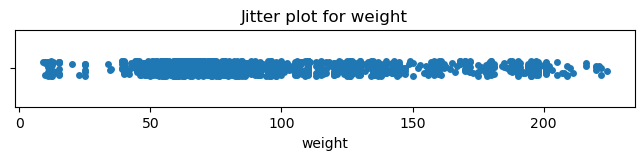

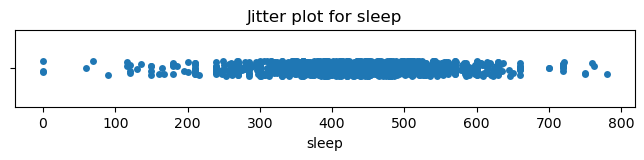

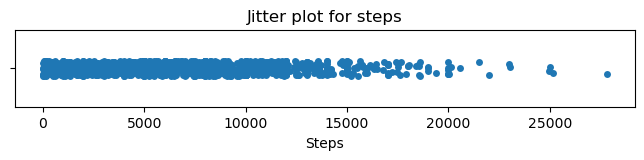

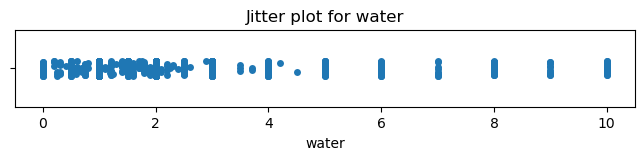

In [33]:
# After outliers removed for 'weight', 'sleep', 'steps', 'water'

plt.figure(figsize=(8, 1))
sns.stripplot(x='weight', data=fdf)
plt.title('Jitter plot for weight')
plt.xlabel('weight')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='sleep', data=fdf)
plt.title('Jitter plot for sleep')
plt.xlabel('sleep')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='steps', data=fdf)
plt.title('Jitter plot for steps')
plt.xlabel('Steps')
plt.show()

plt.figure(figsize=(8, 1))
sns.stripplot(x='water', data=fdf)
plt.title('Jitter plot for water')
plt.xlabel('water')
plt.show()

In [34]:
# Filtered data stats
print("Number of data points", len(fdf['ID'].unique()))
print("Number of unique DATE points", len(fdf['date'].unique()))

print("Number of user IDs",len(fdf['userID'].unique()))
print("Number of period IDs",len(fdf['periodID'].unique()))

Number of data points 26141
Number of unique DATE points 910
Number of user IDs 1918
Number of period IDs 2961


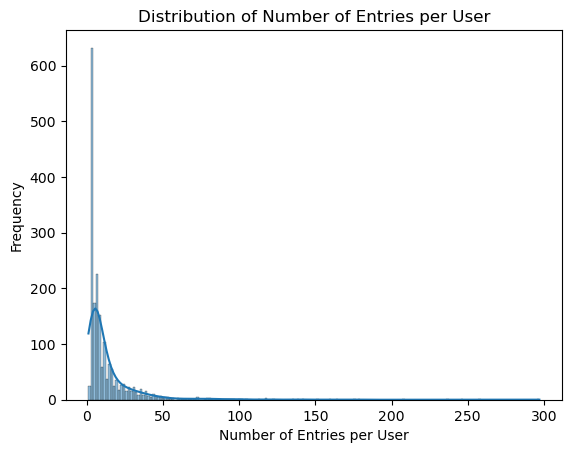

In [35]:
# Visualize filtered user entry distribution
final_entry_cnt = fdf['userID'].value_counts()
final_entry_cnt = final_entry_cnt.reset_index()

sns.histplot(final_entry_cnt['count'], kde=True)
plt.xlabel('Number of Entries per User')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Entries per User')
plt.show()

# Save databases to disk

In [37]:
# Save copy of current panda df to file - data types are changed, empty columns are removed, but no rows are deleted
df.to_csv('expd_data.csv', index=False)

# Save copy of filtered df to file - rows where userIDs are removed
fdf.to_csv('filtered_data.csv', index=False)

In [38]:
# Weight demographics in filtered database
all_users = fdf['userID'].unique()

# userID where some rows have a weight recorded
weight_users = fdf[fdf['weight'].notnull()]['userID'].unique()

no_weight = set(all_users) - set(weight_users)

print("User count:", len(all_users))
print("Users that record weight at least once:", len(weight_users))
print("Users that never record a weight:", len(no_weight))

print("Mean weight", round(fdf['weight'].mean(), 1))
print("Median weight", fdf['weight'].median())

User count: 1918
Users that record weight at least once: 758
Users that never record a weight: 1160
Mean weight 84.6
Median weight 69.0


### Group by user_ID and period_IDs

In [40]:
# Number of periods recorded 

print("Total number of periodIDs", len(fdf['periodID'].unique()))

periods = fdf.groupby('userID')['periodID'].unique()
periods = periods.reset_index()

# Remove nan values
periods['periodID'] = periods['periodID'].apply(lambda x: [value for value in x if not pd.isna(value)])
# Remove empty
periods = periods[periods['periodID'].apply(lambda x: len(x) > 0)]
# count periodID list
periods['count'] = periods['periodID'].apply(len)
periods

Total number of periodIDs 2961


,userID,periodID,count
0,92,"[75.0, 97.0, 119.0, 132.0, 173.0, 181.0, 205.0...",8
1,93,"[92.0, 133.0, 3329.0, 3652.0]",4
2,95,"[504.0, 666.0, 707.0, 834.0, 2262.0]",5
3,96,[66.0],1
4,103,"[79.0, 102.0]",2
...,...,...,...
1907,8455,[4211.0],1
1909,8490,[4228.0],1
1910,8508,[4235.0],1
1912,8524,[4247.0],1


In [41]:
# Users that never record having a period
all_users = fdf['userID'].unique()

# userID where some rows with period is 1
period_users = fdf[fdf['period'] == 1]['userID'].unique()

# Other userIDs
no_period_users = set(all_users) - set(period_users)

print("User count:", len(all_users))
print("Users that record at least 1 period:", len(period_users))
print("Users that never record a period:", len(no_period_users))

User count: 1918
Users that record at least 1 period: 1276
Users that never record a period: 642


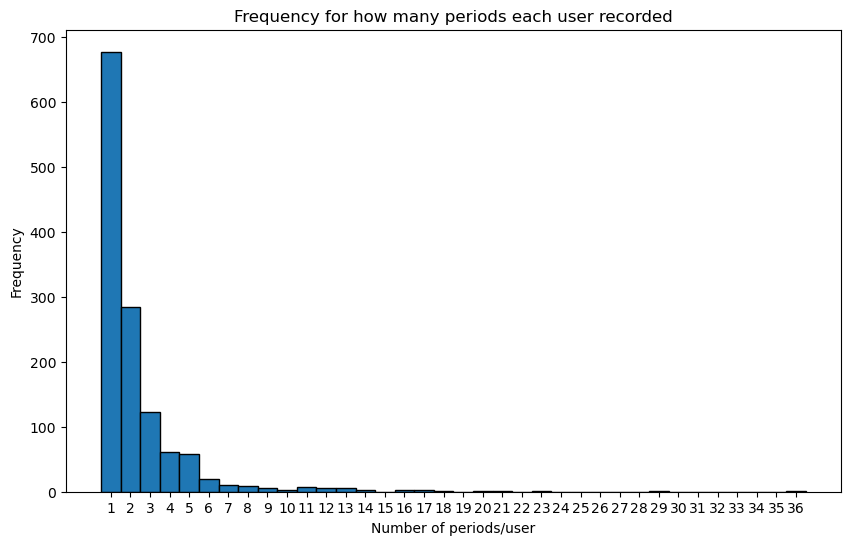

In [42]:
# Frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(periods['count'], bins=range(1, max(periods['count']) + 2), edgecolor='black', align='left')
plt.xlabel('Number of periods/user')
plt.ylabel('Frequency')
plt.title('Frequency for how many periods each user recorded')
plt.xticks(range(1, max(periods['count']) + 1))
plt.show()

# Data point counts in filtered dataset

In [44]:
print("Number of data points", len(fdf['ID'].unique()))
print("Number of user IDs",len(fdf['userID'].unique()))

Number of data points 26141
Number of user IDs 1918


In [45]:
datapt_count = fdf.isna().sum()
datapt_count = datapt_count.reset_index()

datapt_count.rename(columns={'index': 'variable'}, inplace=True)
datapt_count.rename(columns={0: 'missing_count'}, inplace=True)
datapt_count['value_count'] = len(fdf['ID'].unique()) - datapt_count['missing_count']
datapt_count[['variable', 'value_count']][6:]

,variable,value_count
6,periodID,8921
7,period,26141
8,sex,26141
9,period_intensity,8927
10,pain_level,16057
11,backaches,10119
12,bodyaches,8236
13,stomach_cramps,9592
14,joint_pains,5150
15,tender_breasts,4913


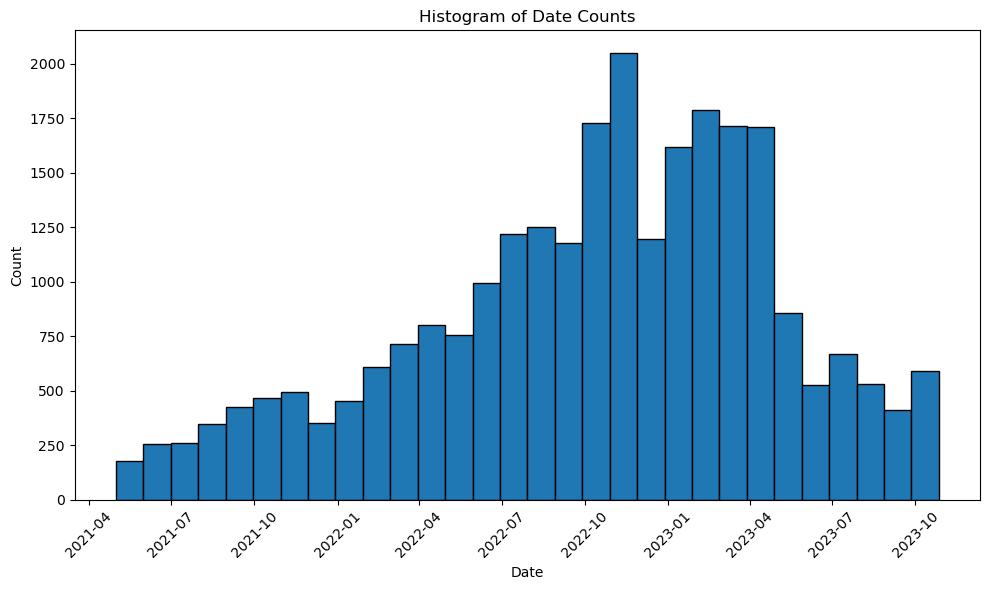

In [46]:
# Histogram of the dates
plt.figure(figsize=(10, 6))
plt.hist(fdf['date'], bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Histogram of Date Counts')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()